In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("height-weight.csv")

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

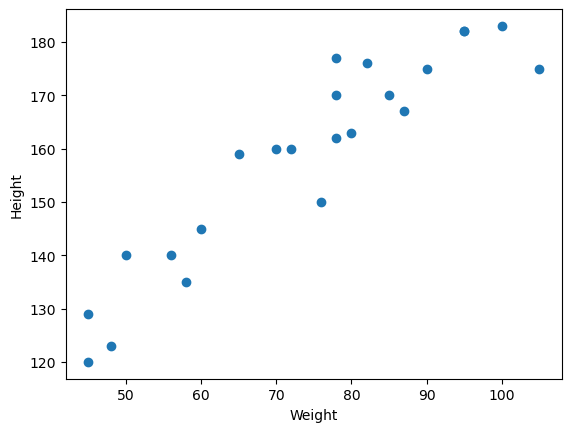

In [5]:
## scatter plot
plt.scatter(df.Weight, df.Height)
plt.xlabel("Weight")
plt.ylabel("Height")

In [6]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


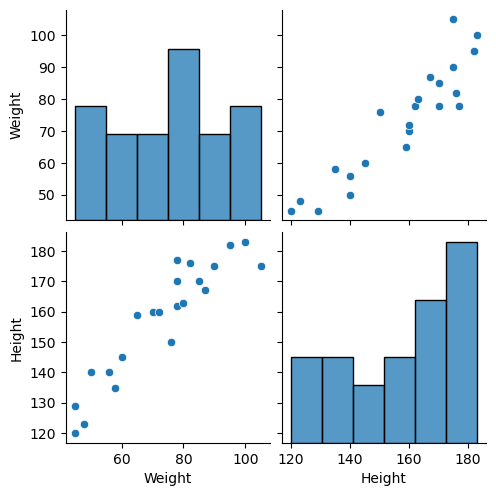

In [10]:
## Seaborn for visualization
import seaborn as sns

sns.pairplot(df)

In [15]:
## Independent and dependent features
X=df[["Weight"]] #independent feature should be dataframe or a 2D array
y=df["Height"] # this can be in series form or 1D array

In [16]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
X_train.shape

(17, 1)

In [19]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

In [24]:
## Apply Simple linear Regression
from sklearn.linear_model import LinearRegression

In [25]:
regression = LinearRegression()

In [26]:
regression.fit(X_train, y_train)

LinearRegression()

In [28]:
print("Coefficient or slope: ", regression.coef_ )

Coefficient or slope:  [17.2982057]


In [29]:
print("Intercept: ", regression.intercept_ )

Intercept:  156.47058823529412


Text(0, 0.5, 'Height')

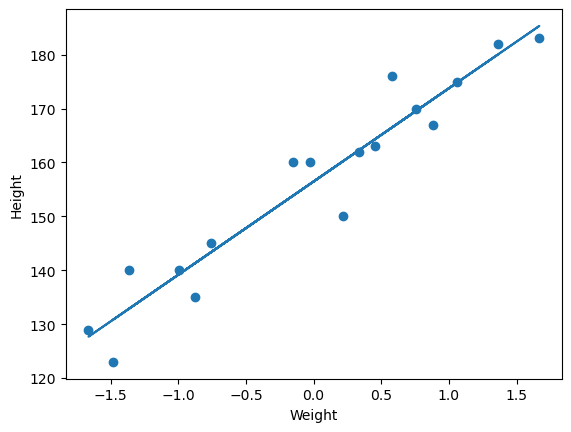

In [35]:
## plot Trining data plot best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))
plt.xlabel("Weight")
plt.ylabel("Height")

In [36]:
## Prediction for test data
y_pred = regression.predict(X_test)

In [37]:
##Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


In [39]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.7360826717981276


In [41]:
## OLS Linear Regression
import statsmodels.api as sm

In [42]:
model = sm.OLS(y_train, X_train).fit()

In [44]:
prediction = model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [45]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Mon, 27 Jan 2025   Prob (F-statistic):                       0.664
Time:                        18:01:22   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\upama\anaconda3\envs\myenv\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [47]:
## Prediction for new data
regression.predict(scaler.transform([[72]]))

C:\Users\upama\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])